In [8]:
# install kaggle
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73058 sha256=acf362d4b34dda7e3fa4c6b13c292f9d2821f5d0df708b62407cb0de7b2f3390
  Stored in directory: c:\users\gebruiker\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


# 1. Importing Data Sets

In [70]:
#Let's find our dataset 
!kaggle datasets list -s 'house'

ref                                                        title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
vikrishnan/boston-house-prices                             Boston House Prices                                  13KB  2017-08-03 17:06:12          46235        358  0.8235294        
shree1992/housedata                                        House price prediction                              432KB  2018-08-26 07:56:22          24095        295  0.64705884       
anmolkumar/house-price-prediction-challenge                House Price Prediction Challenge                      2MB  2020-10-01 19:37:13           6935        120  1.0              
harlfoxem/housesalesprediction                             House Sales in King County

In [22]:
#Another kaggle command 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         81           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         80           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        819           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        141           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1602           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14350           False  
house-pr

In [41]:
#Download the dataset "House Sales in King Count USA"
!kaggle datasets download -d harlfoxem/housesalesprediction


  0%|          | 0.00/780k [00:00<?, ?B/s]
100%|##########| 780k/780k [00:00<00:00, 1.68MB/s]
100%|##########| 780k/780k [00:00<00:00, 1.68MB/s]


In [51]:
#Downloaded is zip file. So we need it to unzip. Firstly install unzip-aes
!pip install unzip-aes

  Created wheel for unzip-aes: filename=unzip_aes-0.1.1-py3-none-any.whl size=2225 sha256=cf9f62ef3fb613fa99aaac6bc7d02dce7543bd54c981c8d810ff5520b1152ef6
  Stored in directory: c:\users\gebruiker\appdata\local\pip\cache\wheels\f9\4f\13\8ffc54b93b8ee32b2981a7da37b8d02c2bbfa8300620059149
Successfully built unzip-aes


In [55]:
#Let's look at unzip-aes usage
!unzip-aes --help

Usage: unzip-aes [OPTIONS] ZIPFILE [DST]

  Unzip AES encrypted zip file.

Options:
  -p, --password TEXT  [required]
  --help               Show this message and exit.


In [65]:
!unzip-aes housesalesprediction.zip -p data/

In [1]:
#You will require the following libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Let's load the csv file
file_name='kc_house_data.csv'
df=pd.read_csv(file_name)

In [3]:
#We use the method head to display the first 5 columns of the dataframe.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Let's display the data types of each column using the function dtypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#Let's glance at the statistical summary of the dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2. Data Wrangling

In [6]:
#When we examine the data, the "id" and "Unnamed: 0" columns are not required for analysis.So we can drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop().
df.drop(["id"], axis=1, inplace=True)

In [7]:
#Let's check it
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#Let's check missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#checking/deleting for duplicated values in data
df.duplicated().sum()

0

# 3. Exploratory Data Analysis

In [10]:
#finding the feature other than price that is most correlated with price
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

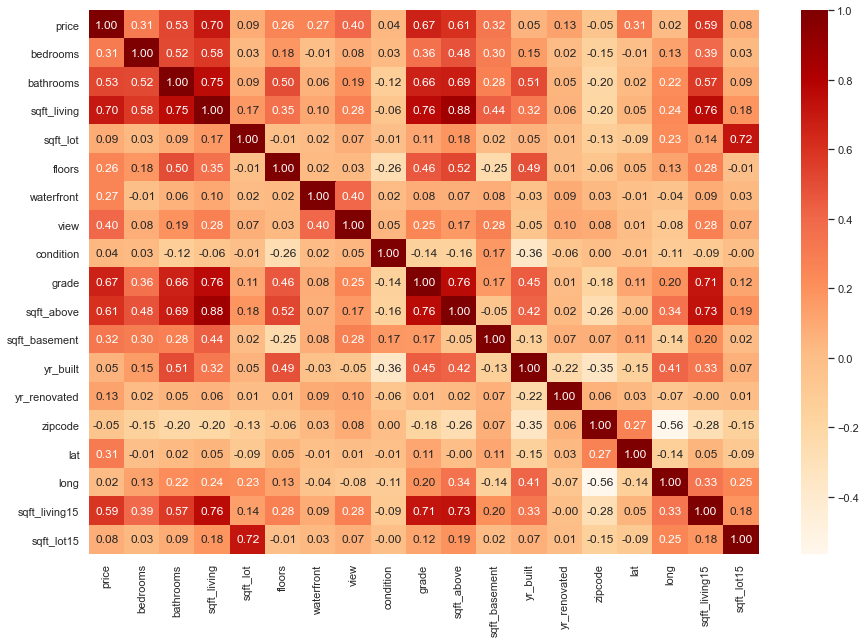

In [11]:
#visualizing column and row correlation
sns.set()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='OrRd')
plt.show()

In [12]:
#counting the number of houses according to condition
condition_counts=df['condition'].value_counts().to_frame()
condition_counts

,condition
3,14031
4,5679
5,1701
2,172
1,30


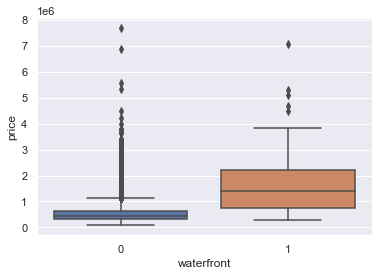

In [13]:
#determining whether houses with a waterfront view or without a waterfront view have more price outliers
sns.boxplot(x="waterfront",y="price",data=df)

(0.0, 8081250.0)

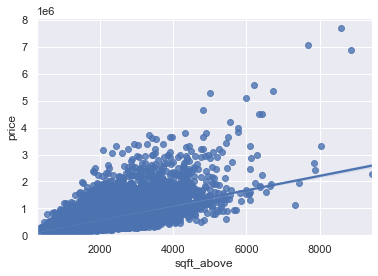

In [14]:
#determining if the feature sqft_above is negatively or positively correlated with price
sns.regplot(x="sqft_above",y="price",data=df)
plt.ylim(0,)

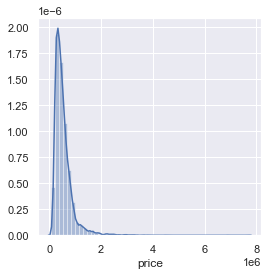

In [15]:
#Distribution of house prices
fig=plt.figure(figsize=[4,4])
sns.distplot(df['price'])  

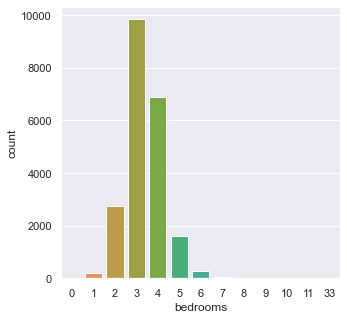

In [16]:
# Number of bedrooms
fig=plt.figure(figsize=[5,5])
sns.countplot(x=df['bedrooms'],data=df)

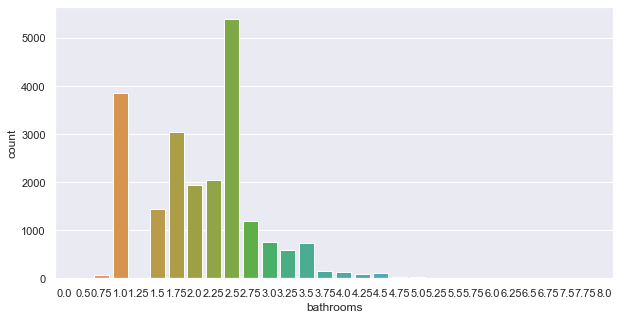

In [17]:
# Number of bathrooms
fig=plt.figure(figsize=[10,5])
sns.countplot(x=df['bathrooms'],data=df)

# 4. Model Development

In [19]:
X1 = df[['sqft_living']]
Y1 = df['price']
lm1 = LinearRegression()
lm1.fit(X1,Y1)
lm1.score(X1,Y1)

0.4928532179037931

In [28]:
features =["yr_renovated", "floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
X2=df[features]
Y2=df["price"]
lm2=LinearRegression()
lm2.fit(X2,Y2)
print(lm2.intercept_)
print(lm2.coef_)
lm2.score(X2,Y2)

-32145925.055850703
[ 5.84567892e+01 -2.92175798e+04  5.86165693e+05  6.67581646e+05
 -2.52983432e+04  6.30232703e+01  6.46540454e+04 -4.90361121e+03
  7.68441511e+00  6.41981490e+01  8.32640182e+04  1.27221418e+02]


0.6617107235880879

In [29]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [30]:
pipe=Pipeline(Input)
pipe.fit(X2,Y2)
pipe.score(X2,Y2)

0.7596380679116121

# 5. Model Evaluation and Refinement

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [33]:
X3 = df[features]
Y3 = df['price']

x_train, x_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [34]:
from sklearn.linear_model import Ridge

In [35]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_test,y_test)

0.6518897672002735

In [40]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
RidgeMod=Ridge(alpha=0.1)
RidgeMod.fit(x_train_pr,y_train)
RidgeMod.score(x_test_pr,y_test)

0.7181656737076844